In [2]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [3]:
import cv2
from keras.models import model_from_json
import numpy as np
import os
import pandas as pd
from keras_preprocessing.image import load_img

In [4]:
#TEST_PATH = '/content/drive/MyDrive/SFEW_1.0/TEST'
#TEST_PATH = '/content/drive/MyDrive/Enhanced training data/TEST'

TEST_PATH = '/content/drive/MyDrive/Kaggle emotion data/test'


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#json_file = open("/content/drive/MyDrive/Trained model normal 48 x 48/emotiondetectornormal48x48.json", "r")
json_file = open("/content/drive/MyDrive/Trained model enhanced 48 x 48/emotiondetectorenhanced1.json", "r")
#json_file = open("/content/drive/MyDrive/Trained model normal/emotiondetectornormal1.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

In [19]:
#model.load_weights("/content/drive/MyDrive/Trained model normal 48 x 48/emotiondetectornormal48*48.h5")
model.load_weights("/content/drive/MyDrive/Trained model enhanced 48 x 48/emotiondetectorenhanced1.h5")
#model.load_weights("/content/drive/MyDrive/Trained model normal/emotiondetectornormal1.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

In [20]:
def extract_features(image):
    image = load_img(image,color_mode="grayscale" )
    #resizing image(use when image res is other than 48 x 48)
   # image = image.resize((48 , 48))
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [21]:
labels = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happy', 4 : 'Neutral', 5 : 'Sad', 6 : 'Surprise'}
accuracy = {'angry': 0,'disgust': 0, 'fear': 0,'happy': 0,'neutral': 0,'sad': 0,'surprise': 0 }
emotions = os.listdir(TEST_PATH)

In [ ]:
# file_counter = 0
# for label in os.listdir(TEST_PATH):
#     file_counter = 0
#     for image in os.listdir(os.path.join(TEST_PATH , label)):
#       file_counter += 1
#     print(f'No of files in {label}: {file_counter}' )

In [22]:
f = open('results.txt' , 'a')

In [23]:

#print("img name curr_emot  model_pred ")
total_images = 0
total_accuracy = 0

for label in os.listdir(TEST_PATH):
    print('For ' + label )
    f.write(f'\nFor {label}\n')
    total_images_folder = 0
    correctly_identified = 0
    ac = 0

    for image in os.listdir(os.path.join(TEST_PATH,label)):
        total_images_folder += 1
        img = extract_features(os.path.join(TEST_PATH,label,image))
        pred = model.predict(img)
        pred_label = labels[pred.argmax()]
        if(label.lower() == pred_label.lower()):
           correctly_identified +=  1
        #print(image  , label , pred_label)
    total_images += total_images_folder
    ac = (correctly_identified/total_images_folder) * 100
    accuracy[label.lower()] = round(ac , 1)    #assigning accuracy values to its correct key
    print('total Images: ' , total_images_folder  , 'Correctly Identified: ' , correctly_identified , 'Accuracy: ' , ac)
    f.write(f"Total Images in folder: {total_images_folder}  Correctly Identified: {correctly_identified} Accuracy: {ac}\n")
    total_accuracy = total_accuracy + correctly_identified
print('total correctly identified: ' , total_accuracy ,'out of: ' ,total_images)
f.write(f'total correctly identified:: { total_accuracy } out of: {total_images}\n')
print('total accuracy' , (total_accuracy / total_images) * 100)
f.write(f'total accuracy: {( total_accuracy / total_images) * 100}\n')



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step
total Images:  1825 Correctly Identified:  687 Accuracy:  37.64383561643835
For angry
1/1 [==============================] - 0s 28ms/step
total Images:  960 Correctly Identified:  183 Accuracy:  19.0625
For neutral
1/1 [==============================] - 0s 27ms/step
total Images:  1216 Correctly Identified:  304 Accuracy:  25.0
For sad
1/1 [==============================] - 0s 59ms/step
total Images:  1139 Correctly Identified:  100 Accuracy:  8.779631255487269
For surprise
1/1 [==============================] - 0s 33ms/step
total Images:  797 Correctly Identified:  81 Accuracy:  10.163111668757843
total correctly identified:  1447 out of:  7066
total accuracy 20.478347013869232


35

In [24]:
f.close()

In [25]:
print(accuracy)
print(len(accuracy))
print(total_images)

{'angry': 19.1, 'disgust': 18.0, 'fear': 7.1, 'happy': 37.6, 'neutral': 25.0, 'sad': 8.8, 'surprise': 10.2}
7
7066


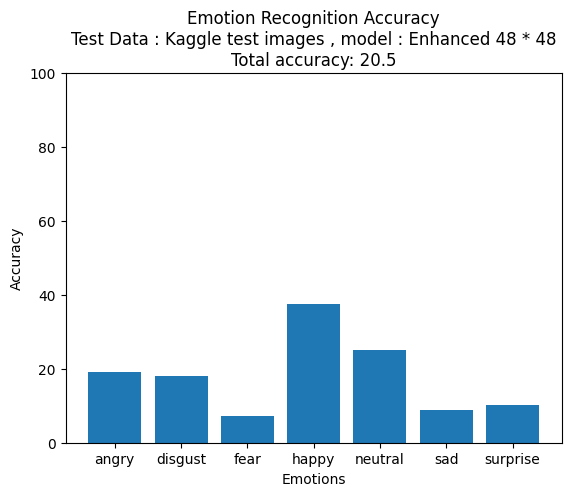

In [27]:
import matplotlib.pyplot as plt

#rounded_ac = [round(num, 1) for num in accuracy.values()]

plt.bar(accuracy.keys() , accuracy.values())
plt.xlabel('Emotions')
plt.ylabel('Accuracy')
plt.title(f'Emotion Recognition Accuracy\nTest Data : Kaggle test images , model : Enhanced 48 * 48\nTotal accuracy: {round((total_accuracy / total_images) * 100 , 1)}')

plt.ylim(0, 100)  # Set the y-axis limits to a range between 0 and 1

plt.show()